In [1]:
!pip install fcapy[all]
!pip install frozendict
!pip install ipynb
!pip install sparselinear
!pip install bitsets
!pip install bitarray

In [2]:
import torch

!pip uninstall torch-scatter torch-sparse torch-geometric torch-cluster  --y
!pip install torch-scatter -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install git+https://github.com/pyg-team/pytorch_geometric.git

Looking in links: https://data.pyg.org/whl/torch-2.5.1+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 26.1 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.5.1+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 28.0 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.5.1+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 26.3 MB/s eta 0:00:00
  Cloning https://github.com/pyg-team/pytorch_geometric.git to /tmp/pip-req-build-egfv2rjw
  Running command git clone --filter=blob:none --quiet https://github.com/pyg-team/pytorch_geometric.git /tmp/pip-req-build-egfv2rjw
  Resolved https://github.com/pyg-team/pytorch_geometric.git to commit bd5ae45c74a3fbb6b6ff818476f7651d84313d2a
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for torch-geometric: filename=torch_geometric-2.7.0-py3-none-any.whl size=11

# Dansh

In [8]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer

# Load the dataset
df = pd.read_csv('/content/heart.csv')

# Remove rows with NaN values
df_cleaned = df.dropna()

# Loop through each column and print unique values and the count of unique values
for column in df_cleaned.columns:
    unique_values = df_cleaned[column].unique()
    print(f"Column: {column}")
    print(f"Unique values: {unique_values}")
    print(f"Number of unique values: {len(unique_values)}\n")

# 1. One-Hot Encoding for categorical variables
categorical_columns = ['cp', 'restecg', 'slope', 'ca', 'thal']
encoder = OneHotEncoder(sparse_output=False)  # Changed from sparse=False to sparse_output=False
encoded_categorical = encoder.fit_transform(df_cleaned[categorical_columns])

# Create a new DataFrame for the encoded columns
encoded_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate with the original DataFrame (excluding the original categorical columns)
df_cleaned = df_cleaned.drop(categorical_columns, axis=1)
df_cleaned = pd.concat([df_cleaned, encoded_df], axis=1)

# 2. KBinsDiscretizer for continuous variables
continuous_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
binning = KBinsDiscretizer(n_bins=2, encode='ordinal', strategy='uniform')  # Example: uniform binning with 5 bins
binned_data = binning.fit_transform(df_cleaned[continuous_columns])

# Create a new DataFrame for the binned columns
binned_df = pd.DataFrame(binned_data, columns=[f'{col}_bin' for col in continuous_columns])

# Concatenate with the original DataFrame (excluding the original continuous columns)
df_cleaned = df_cleaned.drop(continuous_columns, axis=1)
df_cleaned = pd.concat([df_cleaned, binned_df], axis=1)

# Resulting DataFrame with one-hot encoded and binned data
df_cleaned.head()


Column: age
Unique values: [52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]
Number of unique values: 41

Column: sex
Unique values: [1 0]
Number of unique values: 2

Column: cp
Unique values: [0 1 2 3]
Number of unique values: 4

Column: trestbps
Unique values: [125 140 145 148 138 100 114 160 120 122 112 132 118 128 124 106 104 135
 130 136 180 129 150 178 146 117 152 154 170 134 174 144 108 123 110 142
 126 192 115  94 200 165 102 105 155 172 164 156 101]
Number of unique values: 49

Column: chol
Unique values: [212 203 174 294 248 318 289 249 286 149 341 210 298 204 308 266 244 211
 185 223 208 252 209 307 233 319 256 327 169 131 269 196 231 213 271 263
 229 360 258 330 342 226 228 278 230 283 241 175 188 217 193 245 232 299
 288 197 315 215 164 326 207 177 257 255 187 201 220 268 267 236 303 282
 126 309 186 275 281 206 335 218 254 295 417 260 240 302 192 225 325 235
 274 234 182 167 172 321 300 199 564 15

,sex,fbs,exang,target,cp_0,cp_1,cp_2,cp_3,restecg_0,restecg_1,...,ca_4,thal_0,thal_1,thal_2,thal_3,age_bin,trestbps_bin,chol_bin,thalach_bin,oldpeak_bin
0,1,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1,1,1,0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
2,1,0,1,0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,1,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
4,0,1,0,0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [9]:
for column in df_cleaned.columns:
    unique_values = df_cleaned[column].unique()
    print(f"Column: {column}")
    print(f"Unique values: {unique_values}")
    print(f"Number of unique values: {len(unique_values)}\n")

Column: sex
Unique values: [1 0]
Number of unique values: 2

Column: fbs
Unique values: [0 1]
Number of unique values: 2

Column: exang
Unique values: [0 1]
Number of unique values: 2

Column: target
Unique values: [0 1]
Number of unique values: 2

Column: cp_0
Unique values: [1. 0.]
Number of unique values: 2

Column: cp_1
Unique values: [0. 1.]
Number of unique values: 2

Column: cp_2
Unique values: [0. 1.]
Number of unique values: 2

Column: cp_3
Unique values: [0. 1.]
Number of unique values: 2

Column: restecg_0
Unique values: [0. 1.]
Number of unique values: 2

Column: restecg_1
Unique values: [1. 0.]
Number of unique values: 2

Column: restecg_2
Unique values: [0. 1.]
Number of unique values: 2

Column: slope_0
Unique values: [0. 1.]
Number of unique values: 2

Column: slope_1
Unique values: [0. 1.]
Number of unique values: 2

Column: slope_2
Unique values: [1. 0.]
Number of unique values: 2

Column: ca_0
Unique values: [0. 1.]
Number of unique values: 2

Column: ca_1
Unique val


# How the binarisation was achieved.

We are binarizing the dataset by applying One-Hot Encoding to categorical variables, which creates binary columns for each category, and by using the **KBinsDiscretizer** to transform continuous variables (such as age, blood pressure, and cholesterol) into discrete bins. The **KBinsDiscretizer** divides each continuous feature into a specified number of equal-width intervals, based on the range of the data. For example, if the range of a feature is 0 to 200 and we specify 2 bins, the discretizer would create two bins: one for values between 0-100 and the other for values between 101-200. It then assigns each value within those intervals an ordinal value (e.g., 0 for the first bin, 1 for the second, etc.), effectively transforming the continuous data into categorical representations. This approach helps in handling continuous variables by converting them into a fixed number of categories, making them more suitable for certain types of machine learning models. Both transformations are then added to the cleaned dataset.

In [11]:
# Set 'Promo Code Used_Yes' as the index without modifying the original DataFrame
df_with_promo_code = df_cleaned.set_index('sex', inplace=False)

# Display the first few rows of the modified DataFrame
df_with_promo_code.head()


,fbs,exang,target,cp_0,cp_1,cp_2,cp_3,restecg_0,restecg_1,restecg_2,...,ca_4,thal_0,thal_1,thal_2,thal_3,age_bin,trestbps_bin,chol_bin,thalach_bin,oldpeak_bin
sex,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
1,0,1,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
0,1,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [32]:
print(df_with_promo_code.columns)

Index(['fbs', 'exang', 'target', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'restecg_0',
       'restecg_1', 'restecg_2', 'slope_0', 'slope_1', 'slope_2', 'ca_0',
       'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1', 'thal_2', 'thal_3',
       'age_bin', 'trestbps_bin', 'chol_bin', 'thalach_bin', 'oldpeak_bin'],
      dtype='object')


In [12]:
df_boolean = df_with_promo_code.astype(bool)

# Display the first few rows of the transformed DataFrame
df_boolean.head()


,fbs,exang,target,cp_0,cp_1,cp_2,cp_3,restecg_0,restecg_1,restecg_2,...,ca_4,thal_0,thal_1,thal_2,thal_3,age_bin,trestbps_bin,chol_bin,thalach_bin,oldpeak_bin
sex,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,True,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,True,False
1,True,True,False,True,False,False,False,True,False,False,...,False,False,False,False,True,True,False,False,True,True
1,False,True,False,True,False,False,False,False,True,False,...,False,False,False,False,True,True,False,False,False,False
1,False,False,False,True,False,False,False,False,True,False,...,False,False,False,False,True,True,True,False,True,False
0,True,False,False,True,False,False,False,False,True,False,...,False,False,False,True,False,True,False,False,False,False


In [13]:
df_boolean.index = df_boolean.index.astype(str)

In [15]:
from sklearn.model_selection import train_test_split

In [33]:
y_feat = 'target'
df_train, df_test = train_test_split(df_boolean, train_size=0.8, random_state=0)

X_train, y_train = df_train.drop(y_feat, axis=1), df_train[y_feat]
X_test, y_test = df_test.drop(y_feat, axis=1), df_test[y_feat]
X_train.sample()

,fbs,exang,cp_0,cp_1,cp_2,cp_3,restecg_0,restecg_1,restecg_2,slope_0,...,ca_4,thal_0,thal_1,thal_2,thal_3,age_bin,trestbps_bin,chol_bin,thalach_bin,oldpeak_bin
sex,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,True,False,False,False,True,False,False,...,False,False,False,True,False,True,False,False,True,False


In [34]:
K_train = FormalContext.from_pandas(X_train)
K_train

FormalContext (820 objects, 26 attributes, 5831 connections)
 |fbs|exang|cp_0|cp_1|cp_2|...|age_bin|trestbps_bin|chol_bin|thalach_bin|oldpeak_bin|
1|   |     |    |    |    |...|       |           X|        |          X|           |
0|   |     |    |    |   X|...|      X|            |        |          X|           |
1|  X|     |    |    |   X|...|      X|            |        |          X|           |
0|   |     |   X|    |    |...|      X|            |        |           |           |
1|   |    X|   X|    |    |...|      X|            |        |           |           |
0|   |     |    |    |   X|...|       |            |        |          X|           |
1|   |     |    |    |    |...|      X|           X|        |           |           |
1|   |     |    |   X|    |...|      X|            |        |          X|           |
0|   |     |   X|    |    |...|      X|            |        |          X|           |
1|   |     |   X|    |    |...|      X|            |        |          X|      

In [35]:
L = ConceptLattice.from_context(K_train,algo='Sofia', is_monotone=True)
len(L)

100

In [36]:
for c in L:
    y_preds = np.zeros(K_train.n_objects)
    y_preds[list(c.extent_i)] = 1
    c.measures['f1_score'] = f1_score(y_train, y_preds)
    c.measures['recall_score'] = recall_score(y_train, y_preds)

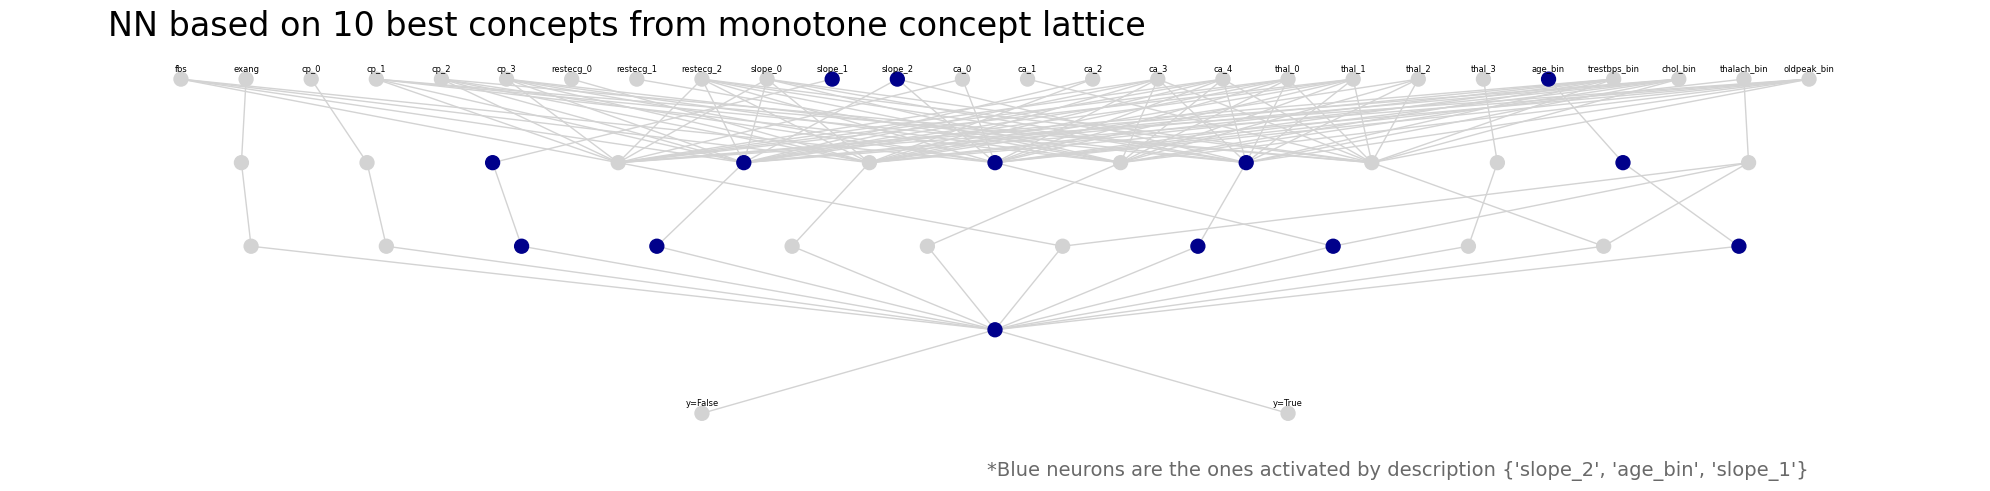


### Results for n_concepts=10, n_epochs=5000 ###

Class prediction: [1 1 0 1 0 0 0 0 0 0]
Class prediction with probabilities: [[5.0673038e-03 9.9493271e-01]
 [5.0673038e-03 9.9493271e-01]
 [1.0000000e+00 7.4933977e-16]
 [5.0673038e-03 9.9493271e-01]
 [1.0000000e+00 5.4694221e-30]
 [1.0000000e+00 1.2849094e-12]
 [1.0000000e+00 2.2865227e-11]
 [1.0000000e+00 4.0524150e-41]
 [1.0000000e+00 3.4568604e-29]
 [9.9996901e-01 3.1040610e-05]]
True class: [ True False False  True False False False False False False]
Recall score: 0.9345794392523364
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        98
           1       0.93      0.93      0.93       107

    accuracy                           0.93       205
   macro avg       0.93      0.93      0.93       205
weighted avg       0.93      0.93      0.93       205

F1 score: 0.9345794392523364
Accuracy score: 0.9317073170731708


In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, classification_report, f1_score, accuracy_score
import neural_lib as nl
from sklearn.metrics import f1_score
# Description for tracing
descr = {'age_bin', 'slope_1', 'slope_2'}

# Case 1: n_concepts = 4, n_epochs = 5000
n_concepts = 10
n_epochs = 5000
best_concepts = list(L.measures['f1_score'].argsort()[::-1][:n_concepts])
assert len({g_i for c in L[best_concepts] for g_i in c.extent_i}) == K_train.n_objects, \
    "Selected concepts do not cover all train objects"

cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(y_train)))
traced = cn.trace_description(descr, include_targets=False)

fig, ax = plt.subplots(figsize=(20, 5))
vis = LineVizNx(
    node_label_font_size=14,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes))+'\n\n'
)
vis.draw_poset(
    cn.poset, ax=ax,
    flg_node_indices=False,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes), only_new_attrs=True)+'\n\n',
    node_color=['darkblue' if el_i in traced else 'lightgray' for el_i in range(len(cn.poset))],
    node_size=100,
    node_label_font_size=6
)
plt.title(f'NN based on {n_concepts} best concepts from monotone concept lattice', loc='left', x=0.05, size=24)
plt.text(max(vis.mover.posx), min(vis.mover.posy)-0.3,
         f'*Blue neurons are the ones activated by description {descr}',
         fontsize=14, ha='right', color='dimgray')
plt.subplots_adjust()
plt.tight_layout()
plt.savefig(f'nn_g_and_b_{n_concepts}.png')
plt.show()

cn.fit(X_train, y_train, n_epochs=n_epochs)
y_pred = cn.predict(X_test).numpy()
y_proba = cn.predict_proba(X_test).detach().numpy()

print(f"\n### Results for n_concepts={n_concepts}, n_epochs={n_epochs} ###\n")
print('Class prediction:', y_pred[:10])
print('Class prediction with probabilities:', y_proba[:10])
print('True class:', y_test.values[:10])
print('Recall score:', recall_score(y_test.values.astype('int'), y_pred))
print(classification_report(y_test.values.astype('int'), y_pred))
print('F1 score:', f1_score(y_test.values.astype('int'), y_pred))
print('Accuracy score:', accuracy_score(y_test.values.astype('int'), y_pred))

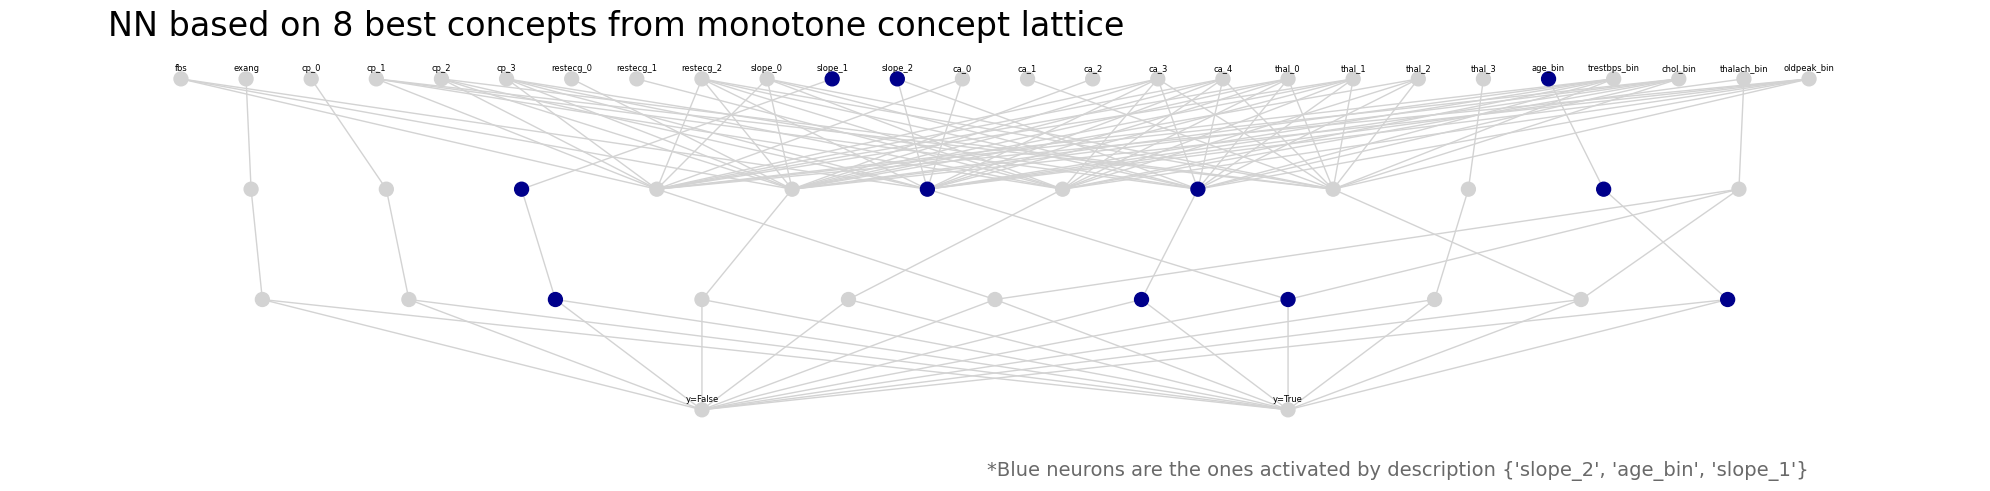


### Results for n_concepts=8, n_epochs=5000 ###

Class prediction: [1 1 0 1 0 0 0 0 0 0]
Class prediction with probabilities: [[7.8990761e-15 1.0000000e+00]
 [4.0845749e-10 1.0000000e+00]
 [1.0000000e+00 1.4765292e-15]
 [1.4341383e-17 1.0000000e+00]
 [1.0000000e+00 1.3060622e-24]
 [1.0000000e+00 2.6943884e-18]
 [9.9997497e-01 2.5091185e-05]
 [1.0000000e+00 1.1277076e-28]
 [1.0000000e+00 3.1975905e-11]
 [9.8200941e-01 1.7990565e-02]]
True class: [ True False False  True False False False False False False]
Recall score: 0.9345794392523364
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        98
           1       0.95      0.93      0.94       107

    accuracy                           0.94       205
   macro avg       0.94      0.94      0.94       205
weighted avg       0.94      0.94      0.94       205

F1 score: 0.9433962264150944
Accuracy score: 0.9414634146341463


In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, classification_report, f1_score, accuracy_score
import neural_lib as nl
from sklearn.metrics import f1_score
# Description for tracing
descr = {'age_bin', 'slope_1', 'slope_2'}

# Case 1: n_concepts = 4, n_epochs = 5000
n_concepts = 8
n_epochs = 5000
best_concepts = list(L.measures['f1_score'].argsort()[::-1][:n_concepts])
assert len({g_i for c in L[best_concepts] for g_i in c.extent_i}) == K_train.n_objects, \
    "Selected concepts do not cover all train objects"

cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(y_train)))
traced = cn.trace_description(descr, include_targets=False)

fig, ax = plt.subplots(figsize=(20, 5))
vis = LineVizNx(
    node_label_font_size=14,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes))+'\n\n'
)
vis.draw_poset(
    cn.poset, ax=ax,
    flg_node_indices=False,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes), only_new_attrs=True)+'\n\n',
    node_color=['darkblue' if el_i in traced else 'lightgray' for el_i in range(len(cn.poset))],
    node_size=100,
    node_label_font_size=6
)
plt.title(f'NN based on {n_concepts} best concepts from monotone concept lattice', loc='left', x=0.05, size=24)
plt.text(max(vis.mover.posx), min(vis.mover.posy)-0.3,
         f'*Blue neurons are the ones activated by description {descr}',
         fontsize=14, ha='right', color='dimgray')
plt.subplots_adjust()
plt.tight_layout()
plt.savefig(f'nn_g_and_b_{n_concepts}.png')
plt.show()

cn.fit(X_train, y_train, n_epochs=n_epochs)
y_pred = cn.predict(X_test).numpy()
y_proba = cn.predict_proba(X_test).detach().numpy()

print(f"\n### Results for n_concepts={n_concepts}, n_epochs={n_epochs} ###\n")
print('Class prediction:', y_pred[:10])
print('Class prediction with probabilities:', y_proba[:10])
print('True class:', y_test.values[:10])
print('Recall score:', recall_score(y_test.values.astype('int'), y_pred))
print(classification_report(y_test.values.astype('int'), y_pred))
print('F1 score:', f1_score(y_test.values.astype('int'), y_pred))
print('Accuracy score:', accuracy_score(y_test.values.astype('int'), y_pred))

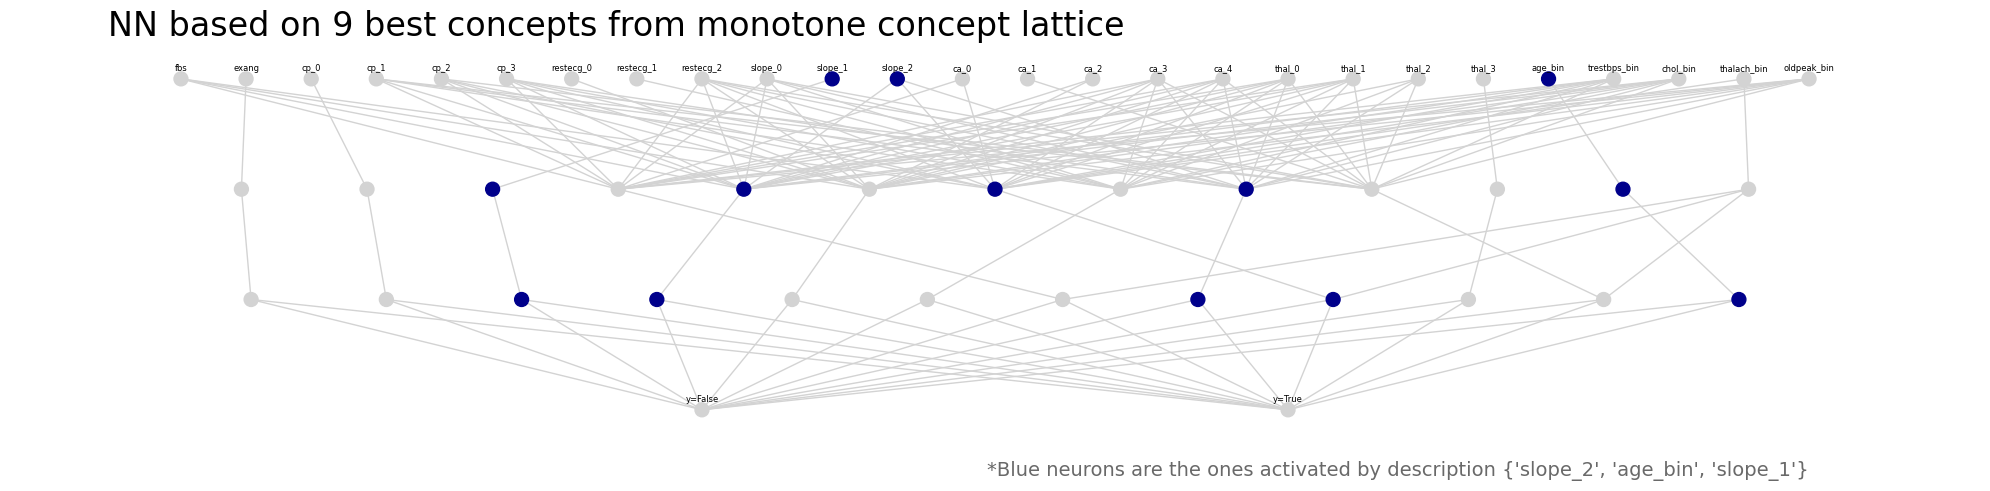


### Results for n_concepts=9, n_epochs=2000 ###

Class prediction: [1 0 0 1 0 0 0 0 0 0]
Class prediction with probabilities: [[3.4323632e-05 9.9996567e-01]
 [5.2765989e-01 4.7234014e-01]
 [9.9996054e-01 3.9490613e-05]
 [3.2687938e-06 9.9999678e-01]
 [9.9999988e-01 8.9077510e-08]
 [9.9961251e-01 3.8746558e-04]
 [9.9756205e-01 2.4379464e-03]
 [9.9999881e-01 1.2175211e-06]
 [9.9999452e-01 5.5398873e-06]
 [8.2089895e-01 1.7910106e-01]]
True class: [ True False False  True False False False False False False]
Recall score: 0.9813084112149533
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        98
           1       0.95      0.98      0.96       107

    accuracy                           0.96       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205

F1 score: 0.963302752293578
Accuracy score: 0.9609756097560975


In [47]:
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, classification_report, f1_score, accuracy_score
import neural_lib as nl
from sklearn.metrics import f1_score
# Description for tracing
descr = {'age_bin', 'slope_1', 'slope_2'}

# Case 1: n_concepts = 4, n_epochs = 5000
n_concepts = 9
n_epochs = 2000
best_concepts = list(L.measures['f1_score'].argsort()[::-1][:n_concepts])
assert len({g_i for c in L[best_concepts] for g_i in c.extent_i}) == K_train.n_objects, \
    "Selected concepts do not cover all train objects"

cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(y_train)))
traced = cn.trace_description(descr, include_targets=False)

fig, ax = plt.subplots(figsize=(20, 5))
vis = LineVizNx(
    node_label_font_size=14,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes))+'\n\n'
)
vis.draw_poset(
    cn.poset, ax=ax,
    flg_node_indices=False,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes), only_new_attrs=True)+'\n\n',
    node_color=['darkblue' if el_i in traced else 'lightgray' for el_i in range(len(cn.poset))],
    node_size=100,
    node_label_font_size=6
)
plt.title(f'NN based on {n_concepts} best concepts from monotone concept lattice', loc='left', x=0.05, size=24)
plt.text(max(vis.mover.posx), min(vis.mover.posy)-0.3,
         f'*Blue neurons are the ones activated by description {descr}',
         fontsize=14, ha='right', color='dimgray')
plt.subplots_adjust()
plt.tight_layout()
plt.savefig(f'nn_g_and_b_{n_concepts}.png')
plt.show()

cn.fit(X_train, y_train, n_epochs=n_epochs)
y_pred = cn.predict(X_test).numpy()
y_proba = cn.predict_proba(X_test).detach().numpy()

print(f"\n### Results for n_concepts={n_concepts}, n_epochs={n_epochs} ###\n")
print('Class prediction:', y_pred[:10])
print('Class prediction with probabilities:', y_proba[:10])
print('True class:', y_test.values[:10])
print('Recall score:', recall_score(y_test.values.astype('int'), y_pred))
print(classification_report(y_test.values.astype('int'), y_pred))
print('F1 score:', f1_score(y_test.values.astype('int'), y_pred))
print('Accuracy score:', accuracy_score(y_test.values.astype('int'), y_pred))

# Comparison with other models


=== Decision Tree ===
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       159
           1       1.00      0.94      0.97       149

    accuracy                           0.97       308
   macro avg       0.97      0.97      0.97       308
weighted avg       0.97      0.97      0.97       308



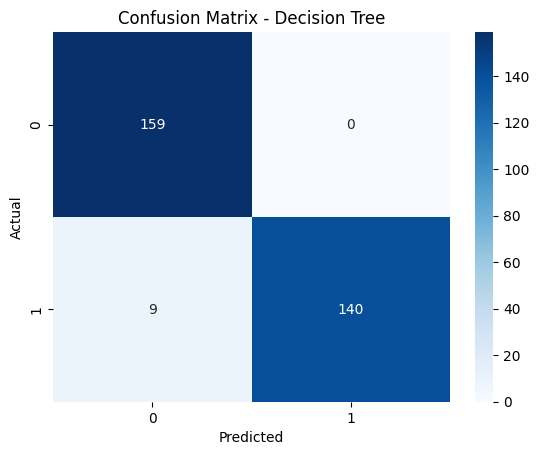

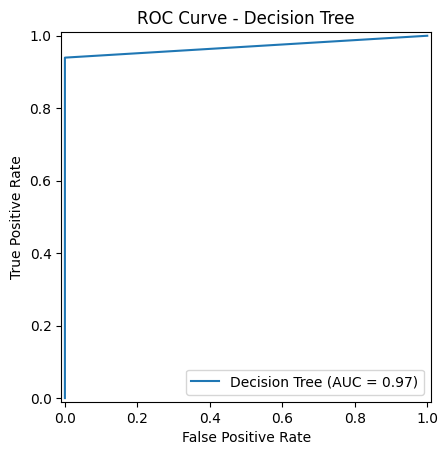


=== Random Forest ===
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       159
           1       1.00      0.96      0.98       149

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308



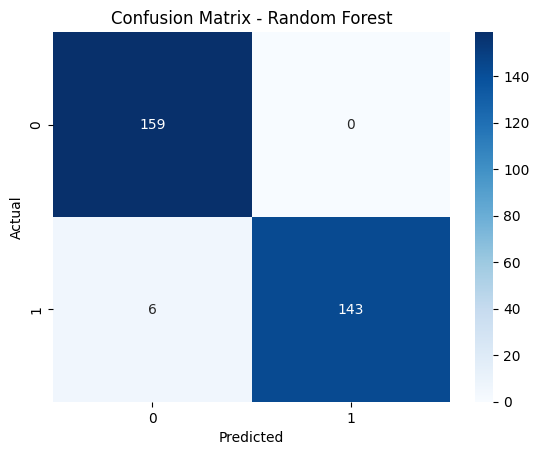

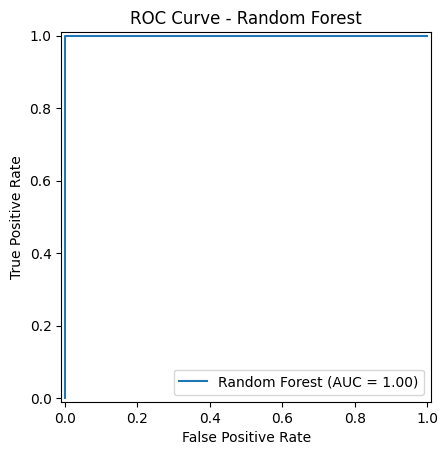


=== XGBoost ===


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:31:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.96      1.00      0.98       159
           1       1.00      0.96      0.98       149

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308



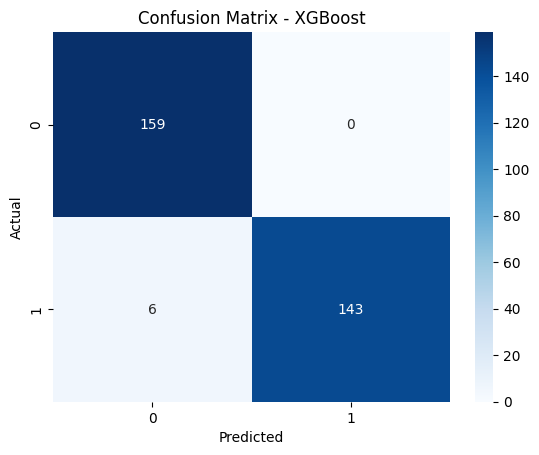

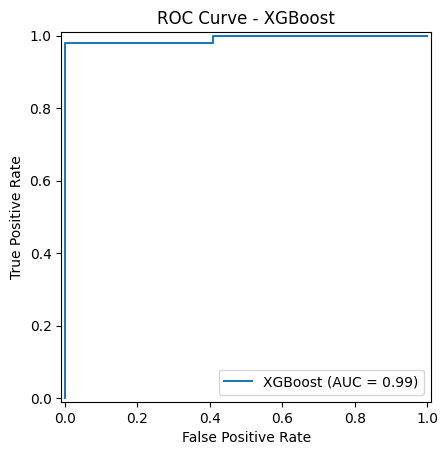


=== CatBoost ===
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       159
           1       1.00      0.98      0.99       149

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



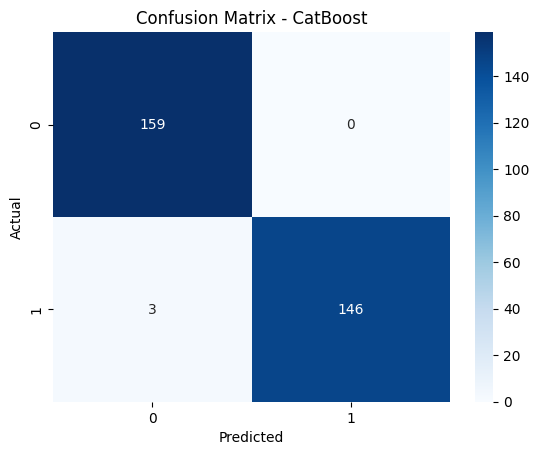

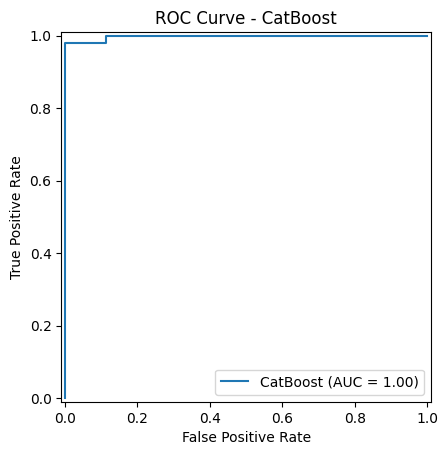


=== KNN ===
              precision    recall  f1-score   support

           0       0.87      0.82      0.84       159
           1       0.82      0.87      0.84       149

    accuracy                           0.84       308
   macro avg       0.84      0.84      0.84       308
weighted avg       0.84      0.84      0.84       308



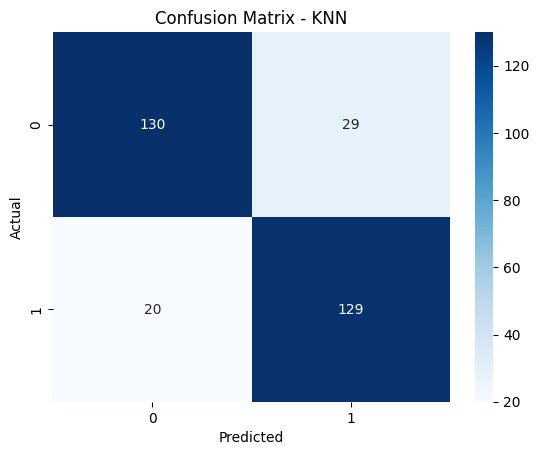

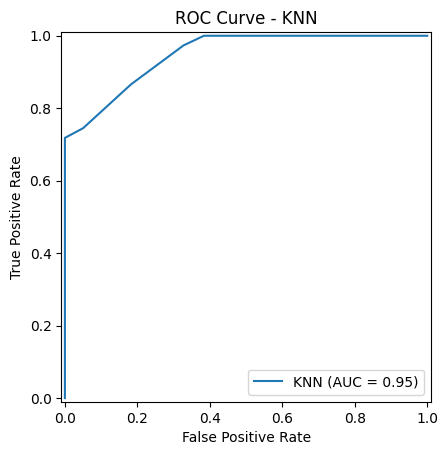


=== Naive Bayes ===
              precision    recall  f1-score   support

           0       0.88      0.74      0.81       159
           1       0.76      0.89      0.82       149

    accuracy                           0.81       308
   macro avg       0.82      0.82      0.81       308
weighted avg       0.82      0.81      0.81       308



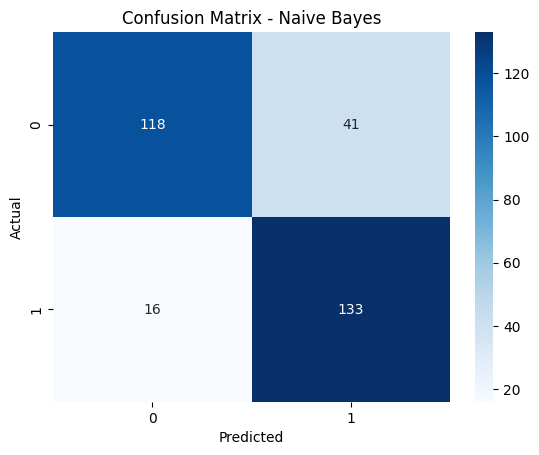

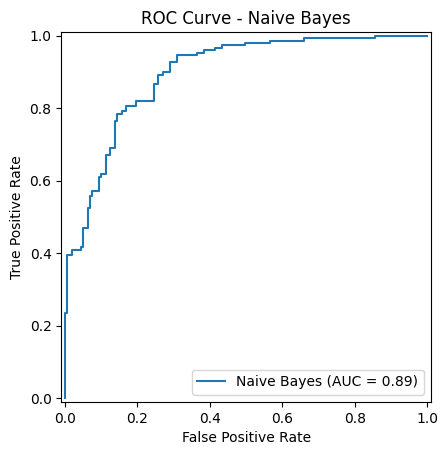


=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.86      0.75      0.80       159
           1       0.76      0.87      0.81       149

    accuracy                           0.81       308
   macro avg       0.81      0.81      0.80       308
weighted avg       0.81      0.81      0.80       308



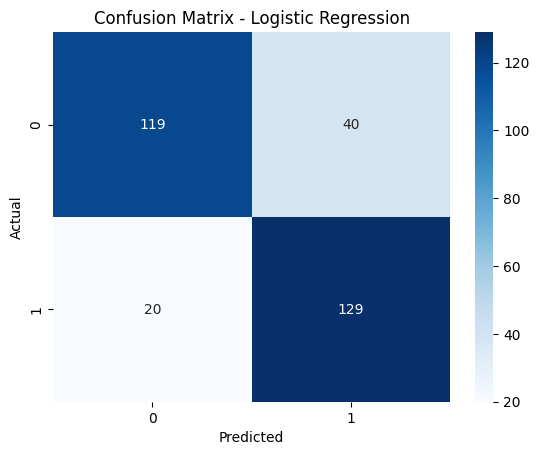

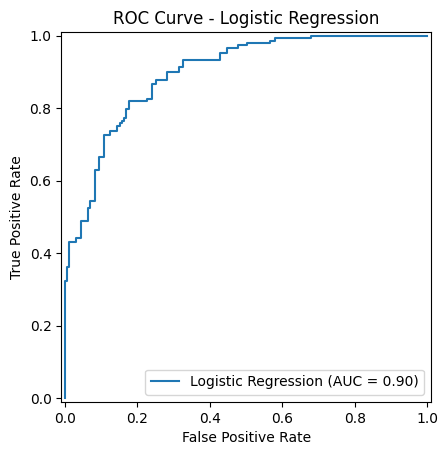

In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_curve, auc, RocCurveDisplay
)
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/heart.csv')

# Preprocessing
# Assume the target column is named 'Target' and others are features
target_column = 'target'  # Replace with the actual target column name
X = df.drop(columns=[target_column])
y = df[target_column]

# Encoding categorical variables
X = pd.get_dummies(X, drop_first=True)
le = LabelEncoder()
y = le.fit_transform(y)

# Splitting data into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling features (for KNN, Logistic Regression, etc.)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Classifiers to evaluate
classifiers = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000)
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    print(f"\n=== {name} ===")
    if name in ["KNN", "Naive Bayes", "Logistic Regression"]:
        # Use scaled data for these models
        clf.fit(X_train_scaled, y_train)
        y_pred = clf.predict(X_test_scaled)
        y_proba = clf.predict_proba(X_test_scaled)[:, 1] if hasattr(clf, "predict_proba") else None
    else:
        # Use raw data for others
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        y_proba = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else None

    # Classification report
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ROC Curve
    if y_proba is not None:
        fpr, tpr, thresholds = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=name).plot()
        plt.title(f"ROC Curve - {name}")
        plt.show()
